# Linear Regression

# Importing the required libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data set using pandas.

In [37]:
df=pd.read_csv('../data/Advertising.csv')

## "info" provides the information of the dataset. and also to check if the columns have correct data type.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Returning the top five rows using head command.

In [36]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Describe provides the description of the data in the dataset.

In [39]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## correlation of the feature columns to the label column can be found using df.corr().

In [41]:
df.corr()['sales']

TV           0.782224
radio        0.576223
newspaper    0.228299
sales        1.000000
Name: sales, dtype: float64

### from this we can see that "TV" feature is highly correlated to the label column and "newspaper" column is least correlated to the label column i.e., "sales".

## Machine Learning

## Choosing the variables x for features and y for label.

In [4]:
x=df.drop('sales',axis=1)
y=df['sales']

## Polynomial features is a technique used in scikit-learn to generate a new set of features by raising the existing features to a specified power. It can be used to capture non-linear relationships between the features and the target variable in a linear regression model.

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
poly_conv=PolynomialFeatures(degree=3)

In [7]:
poly_feat=poly_conv.fit_transform(x)

## train | test split 
### splits the data set into train set for training the model and test set for testing the predictions done by that trained model.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(poly_feat,y,test_size=0.3,random_state=101)

## Standard Scaler
### StandardScaler is a technique used in machine learning to standardize the features of a dataset. It transforms the features so that they have a mean of zero and a standard deviation of one. StandardScaler is useful when the input features have different scales or units, as it makes it easier for the machine learning algorithm to learn the weights of the features.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()

In [12]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## Linear Regression 
### linear regression is used to find the best fit line that describes the relationship between the input feature and the target variable. and make predictions based on that line.

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model=LinearRegression()

### evaluating only on the training data.
### caution: if test set should not be used as it might leak the information to the model before training.

In [15]:
model.fit(x_train,y_train)

LinearRegression()

In [16]:
predict=model.predict(x_test)

## Evaluation
###  Metrics

Make sure you've viewed the video on these metrics!
The three most common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [18]:
mean_absolute_error(y_test,predict)

0.412751608529749

In [19]:
np.sqrt(mean_squared_error(y_test,predict))

0.5803286825159596

### finding the best degree value to reduce the error.

In [20]:
train_rmse_error=[]
test_rmse_error=[]
for d in range(1,10):
    poly_conv=PolynomialFeatures(degree=d)
    poly_feat=poly_conv.fit_transform(x)
    x_train,x_test,y_train,y_test=train_test_split(poly_feat,y,test_size=0.3,random_state=101)
    x_train=scaler.fit_transform(x_train)
    x_test=scaler.transform(x_test)
    model.fit(x_train,y_train)
    train=model.predict(x_train)
    test=model.predict(x_test)
    train_rmse=np.sqrt(mean_squared_error(y_train,train))
    test_rmse=np.sqrt(mean_squared_error(y_test,test))
    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)


### visualising the errors to find the best degree value.

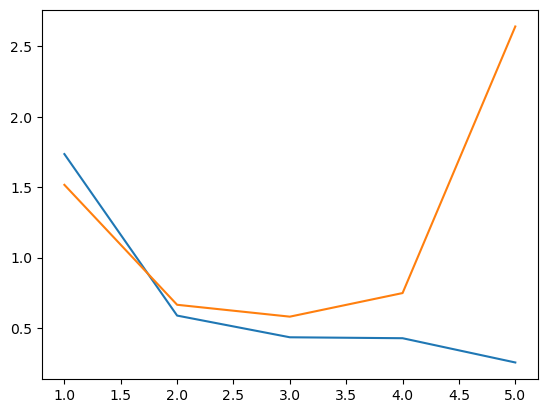

In [21]:
plt.plot(range(1,6),train_rmse_error[:5])
plt.plot(range(1,6),test_rmse_error[:5])

### creating final polynomial features with degree 3 and final model and save them using joblib to make predictions using new data.

In [22]:
final_poly_conv=PolynomialFeatures(degree=3)


In [24]:
final_poly_feat=final_poly_conv.fit_transform(x)

In [23]:
final_model=LinearRegression()

In [25]:
final_model.fit(final_poly_feat,y)

LinearRegression()

### using joblib to dump and load the data to make predictions on the new data and also to share the model to others for collaboration

In [26]:
from joblib import dump,load

In [27]:
dump(final_poly_conv,'final_poly_conv.joblib')

['final_poly_conv.joblib']

In [28]:
dump(final_model,'final_model.joblib')

['final_model.joblib']

In [29]:
load_poly=load('final_poly_conv.joblib')

In [30]:
load_model=load('final_model.joblib')

## predicting on new data

In [31]:
new=[[149,22,12]]

In [32]:
new_scaled=final_poly_conv.fit_transform(new)

In [33]:
final_model.predict(new_scaled)

array([14.64501014])